In [1]:
# Task 2 prediction using unsupervised ML
#list library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from scipy import stats
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from yellowbrick.cluster import KElbowVisualizer

In [2]:
#Load Iris Dataset
url = "Iris.csv"
iris = pd.read_csv(url)
print("Data imported successfully")
iris.head(151)

Data imported successfully


,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica


In [3]:
#Exploring the data
iris.describe() #mean ,std deviation etc ##to display stats

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


In [4]:
#to know data type:
iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [5]:
print(iris.head())

   Id  SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm      Species
0   1            5.1           3.5            1.4           0.2  Iris-setosa
1   2            4.9           3.0            1.4           0.2  Iris-setosa
2   3            4.7           3.2            1.3           0.2  Iris-setosa
3   4            4.6           3.1            1.5           0.2  Iris-setosa
4   5            5.0           3.6            1.4           0.2  Iris-setosa


In [6]:
# Define a range of k values for KMeans
k_range = range(1,8)

# Create a list to store inertia values
inertias = []

In [7]:
features = ["SepalLengthCm", "SepalWidthCm", "PetalLengthCm", "PetalWidthCm"]
x = iris[features]
# Perform KMeans clustering and calculate inertia for each k
for k in k_range:
  kmeans = KMeans(n_clusters=k, random_state=0)  # Set random_state for reproducibility
  kmeans.fit(x)
  inertias.append(kmeans.inertia_)

In [8]:
# Create a KElbowVisualizer object
visualizer = KElbowVisualizer(kmeans, k=k_range, metric="distortion")

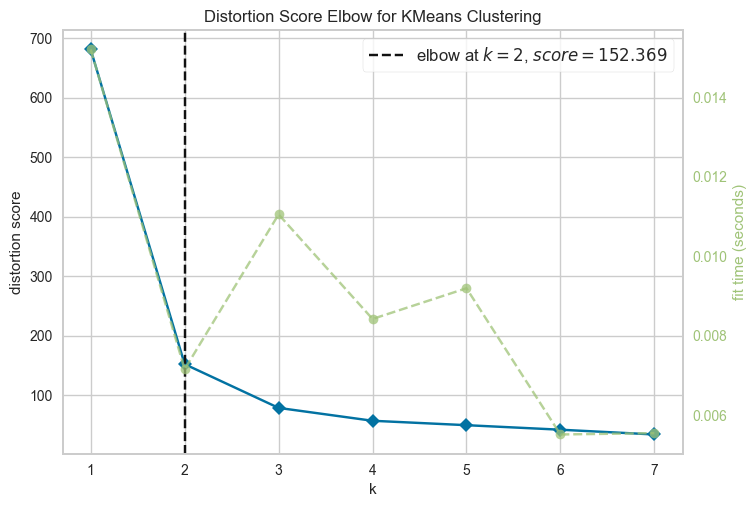

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [9]:
# Fit the data and show the elbow plot
visualizer.fit(x)
visualizer.show()

    The x-axis of the image shows the number of clusters (k), and the y-axis shows the distortion score. The elbow of the
curve is the point where the distortion score starts to decrease more slowly. This is the optimal k value because it represents the point where the clustering is balanced between having too many clusters and having too few clusters. 
    This means that the optimal number of clusters is 2 and the distortion score at k=2 is 152.369. The fit time at k=2 is 
0.014 seconds.

Text(0, 0.5, 'sepal width in cms')

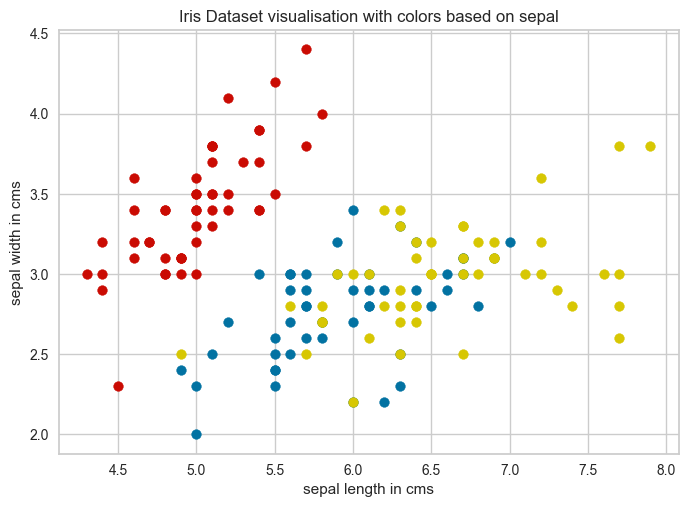

In [10]:
#classified flower variety based on color sepal width vs length
colors = {'Iris-setosa':'r', 'Iris-versicolor':'b', 'Iris-virginica':'y'}

colors = {'Iris-setosa':'r', 'Iris-versicolor':'b', 'Iris-virginica':'y'}
fig, cx = plt.subplots()

for i in range(len(iris['SepalLengthCm'])):
    cx.scatter(iris['SepalLengthCm'][i], iris['SepalWidthCm'][i],color=colors[iris['Species'][i]])

cx.set_title('Iris Dataset visualisation with colors based on sepal')
cx.set_xlabel('sepal length in cms')
cx.set_ylabel('sepal width in cms')

The graph shows that the sepal length and width are not good features for distinguishing between the three species of iris.

Text(0, 0.5, 'petal width in cms')

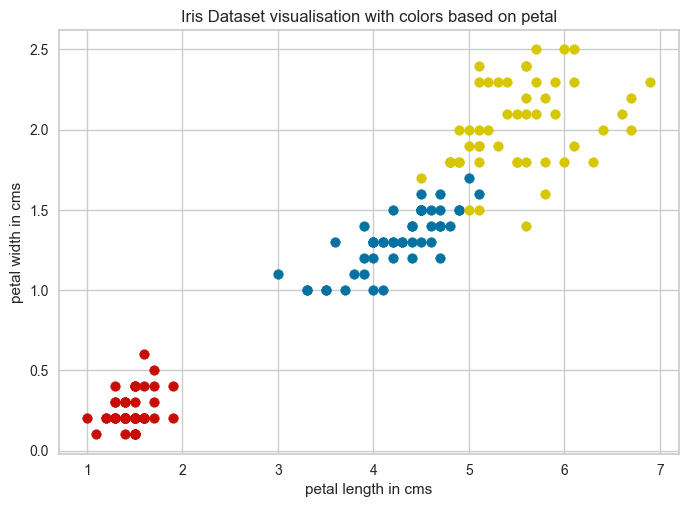

In [13]:
#classified flower variety based on color petal width vs petal length
colors = {'Iris-setosa':'r', 'Iris-versicolor':'b', 'Iris-virginica':'y'}

colors = {'Iris-setosa':'r', 'Iris-versicolor':'b', 'Iris-virginica':'y'}
fig, cx = plt.subplots()

for i in range(len(iris['PetalLengthCm'])):
    cx.scatter(iris['PetalLengthCm'][i], iris['PetalWidthCm'][i],color=colors[iris['Species'][i]])

cx.set_title('Iris Dataset visualisation with colors based on petal')
cx.set_xlabel('petal length in cms')
cx.set_ylabel('petal width in cms')

The graph shows that the petal length and width are good features for distinguishing between the three species of iris. The setosa flowers can be easily distinguished from the other two species based on their petal length and width. The versicolor and virginica flowers are more difficult to distinguish from each other, but they can still be separated based on their petal length and width.